In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loan Application Status Prediction

#### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

- __Independent Variables:__

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

- __Dependent Variable (Target Variable):__
 
- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#Lets check the shape of dataset
df.shape

(614, 13)

In [4]:
#check for Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We are having null values in 7 columes, we will replace the with suitable value.

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# we will drop loan id column as it just contain id which not required for predicting target variable
df.drop(columns = "Loan_ID", inplace = True)

In [7]:
#lets replace null values from categorical data with mode of that column
for col in df.columns:
    if df[col].dtype=="object":
        df[col].fillna(df[col].mode().iloc[0], inplace = True)

In [8]:
#replacing NaN values in numerical columns with mean of that column
for col in df.columns:
    if df[col].dtype=="float64":
        df[col].fillna(df[col].mean(), inplace = True)

In [9]:
#now check null values again
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

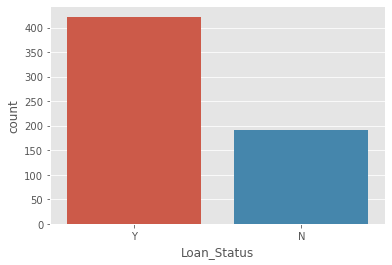

In [10]:
#Lets chcek the count of each type of class in loan status 
plt.style.use('ggplot')
sns.countplot(df["Loan_Status"])
plt.show()

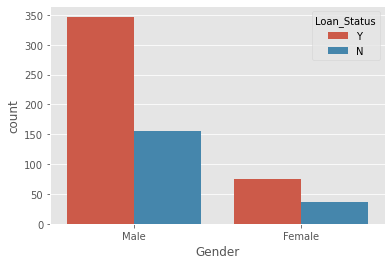

In [11]:
#Lets check relation between gender and Loan_Status
sns.countplot(x = "Gender", hue = "Loan_Status", data = df)
plt.show()

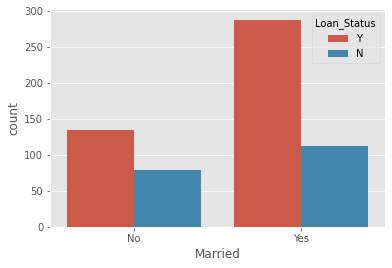

In [12]:
#lets check the relation between marital status and Loan status
sns.countplot(x = "Married", hue = "Loan_Status", data = df)
plt.show()

* By above plot we can say number of married people who takes loans is more than unmarried people.
* And also ratio of getting loans to not getting loans is more when they are married.

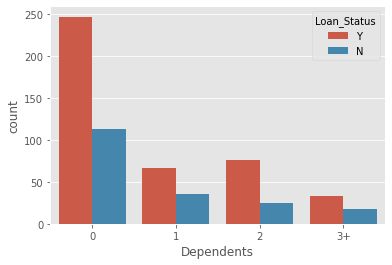

In [13]:
#lets see how loan status is related to feature dependents
sns.countplot(x = "Dependents", hue = "Loan_Status", data = df)
plt.show()

* Here we can say more number of applications from independent people, and also these people has higher ratio of getting loan to not getting loan.
* The applicants who are living with more than 3 people has less chance of getting loans compared to others.

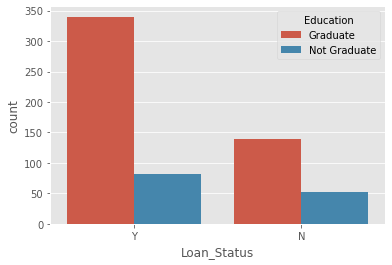

In [14]:
#Lets check loan status based on education
sns.countplot(x = "Loan_Status", hue = "Education", data = df)
plt.show()

* Here we can say people who are graduated has more tendency of getting loan than who are not.

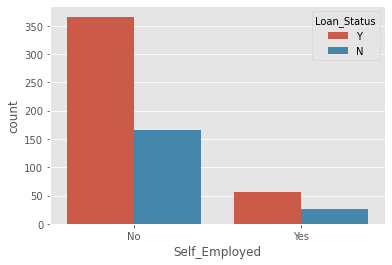

In [15]:
#Lets check count plot for loan status considering "Self_Employed"
sns.countplot( x = "Self_Employed", hue = "Loan_Status", data = df)
plt.show()

* we can say there are more applications from people who are not self employed. And they have higher ratio of getting loan as well compared to people who are self employed. 

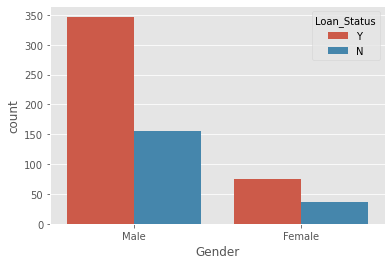

In [16]:
#lets check the loan status considering "Gender"
sns.countplot(x = "Gender", hue = "Loan_Status", data = df)
plt.show()

We can say more number of applicants are males, and they have higher ratio of gatting loan compared to females.

In [17]:
#lets have a look on unique elements from property area
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

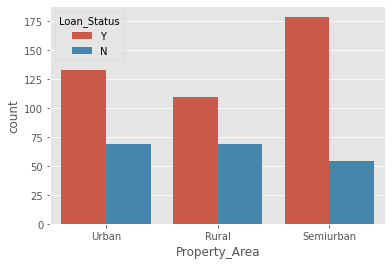

In [18]:
#lets check loan status based on property area
sns.countplot(x = "Property_Area", hue = "Loan_Status", data = df)
plt.show()

* Applicants from Semiurban area has higher ratio of getting loan compared to others.

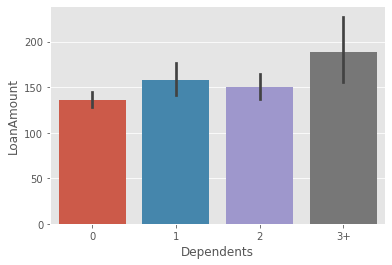

In [19]:
#lets check the relation between loan ammount and dependents
sns.barplot(x = "Dependents", y = "LoanAmount", data = df)
plt.show()

* We can see the loan amount requested by applicants who are with more than three dependents is higher than other.

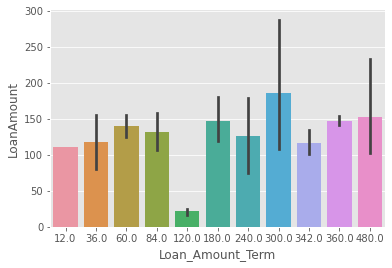

In [20]:
#Lets plot the barplot for loan amount and loan amount term
sns.barplot(x = "Loan_Amount_Term", y = "LoanAmount", data = df)
plt.show()

the loan amount term of 120 is having very less loan ammount compared to other classes.

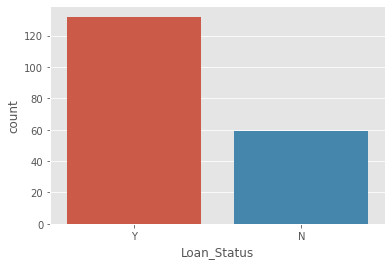

In [21]:
#Lets chcek loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data = df.loc[df["ApplicantIncome"]>5000])
plt.show()

* We can say that ratio of getting loan is higher for the applicants having income greater than 5000

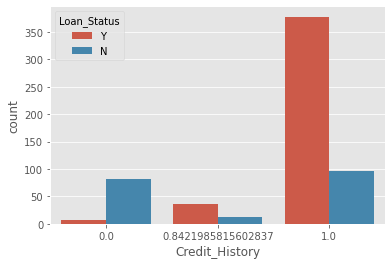

In [23]:
#Lets check the loan status based on Credit_History
sns.countplot(x = "Credit_History", hue = "Loan_Status", data =df)
plt.show()

* By above observation we can say if the credit history is 0 then chances of getting loan are very less than chances of not getting loan.
* And if the Credit_History is 1, then ratio of getting loan is higher than not getting.

In [24]:
#first lets convert our dependent variable (label) into numeric data
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df2 = leb_enc.fit_transform(df["Loan_Status"])
pd.Series(df2)
df["Loan_Status"] = df2

## Heat-Map to check correlation

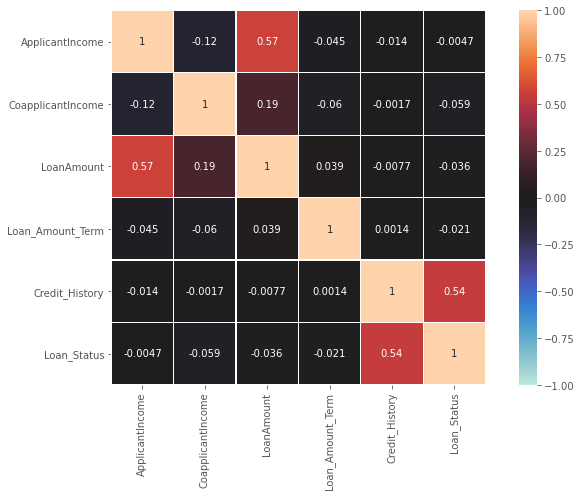

In [25]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* By seeing heat map we can say the column Credit_History is showing maximum coefficient of correlation with our target variable that is 0.54.
* Other features are showing very less relation with target variable.
* LoanAmount is related with ApplicantIncome with 0.57 of correlation coefficient.

In [26]:
#lets have a look on data description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


By looking at data it seems like there are outliers present in some columns

In [27]:
#lets check the skewness
df.skew()
#we can say there is skewness in each column, first remove outliers and check again for skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [28]:
#Remove outliers from data using zscore
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [29]:
df

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
573,610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
574,611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
575,612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


* By removing outliers we are loosing 5-6 % data, for getting good results we are removing outliers from dataset.

In [30]:
# Lets drop index column
df.drop(columns = "index", inplace = True)

In [31]:
#lets check the skewness now
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Loan_Status         -0.822635
dtype: float64

In [32]:
# first we need to saperate our data intp label and features
x = df.drop(columns = ["Loan_Status"])
y = df["Loan_Status"]

In [33]:
#skewness treatment
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [34]:
#check skewness again
x.skew()

ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.187931
Loan_Amount_Term    -0.909280
Credit_History      -1.810561
dtype: float64

In [35]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in x.columns:
    x[i] = leb_enc.fit_transform(x[i])

In [36]:
#Lets have a look on our target variable value count
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [37]:
#It looks the data is imbalance
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [38]:
#lets seperate numerical data and apply standard scalar to it
num_data = pd.DataFrame(x_over, columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns=num_data.columns)

In [39]:
cat_data = x_over.drop(columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])


In [40]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in cat_data.columns:
    cat_data[i] = leb_enc.fit_transform(cat_data[i])

In [41]:
#Lets join both categorical data and numerical data of our features
X = x_num.join(cat_data)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.971309,-0.835604,0.372589,0.365917,0.723285,1,0,0,0,0,2
1,0.464576,-0.178328,-0.089982,0.365917,0.723285,1,1,1,0,0,0
2,-0.742639,-0.835604,-1.429000,0.365917,0.723285,1,1,0,0,1,2
3,-1.100332,0.974790,-0.284748,0.365917,0.723285,1,1,0,1,0,2
4,1.008569,-0.835604,0.226514,0.365917,0.723285,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
791,0.263374,1.067039,0.202168,0.365917,-1.612354,1,0,0,0,0,2
792,-0.608504,-0.835604,-1.355963,0.365917,-0.444534,0,0,0,0,0,2
793,-1.532545,1.343787,-0.455168,0.365917,0.723285,1,0,0,0,0,1
794,-0.973649,-0.835604,-1.136851,-0.570642,-1.612354,0,0,0,0,0,1


## Finding best random_state

In [42]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(150,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8291457286432161 on Random State 150


In [43]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, y_over, test_size = 0.25, random_state = max_rs )

In [44]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 82.91457286432161%
---------------------------------------------------
roc_auc_score: 82.89393939393939%
Confusion Matrix : 
 [[78 21]
 [13 87]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        99
           1       0.81      0.87      0.84       100

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



In [45]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 73.36683417085426%
---------------------------------------------------
roc_auc_score: 73.40404040404042%
Confusion Matrix : 
 [[80 19]
 [34 66]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        99
           1       0.78      0.66      0.71       100

    accuracy                           0.73       199
   macro avg       0.74      0.73      0.73       199
weighted avg       0.74      0.73      0.73       199



In [46]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 82.91457286432161%
---------------------------------------------------
roc_auc_score: 82.9191919191919%
Confusion Matrix : 
 [[83 16]
 [18 82]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.84      0.82      0.83       100

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



In [47]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 80.40201005025126%
---------------------------------------------------
roc_auc_score: 80.40909090909089%
Confusion Matrix : 
 [[81 18]
 [21 79]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.81      0.79      0.80       100

    accuracy                           0.80       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199



In [48]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_svc)*100}%")
print("---------------------------------------------------")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_svc)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_svc)}")

Accuracy Score: 80.90452261306532%
---------------------------------------------------
roc_auc_score: 80.87878787878788%
Confusion Matrix : 
 [[75 24]
 [14 86]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.78      0.86      0.82       100

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199



In [49]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[11:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------------------
Accuracy Score: 83.41708542713567%
roc_auc_score: 83.42424242424242%
Confusion Matrix : 
 [[84 15]
 [18 82]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.85      0.82      0.83       100

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



## Cross Validation

In [50]:
#Let's check cross validation score for all algorithms
#for LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(LR, X, y_over, cv = 5,scoring = "accuracy" )
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.785251572327044


In [51]:
#Let's check cross validation score for DecisionTreeClassifier
scores = cross_val_score(dt, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.7651100628930818


In [52]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.8079009433962264


In [53]:
#Let's check cross validation score for KNeighborsClassifier
scores = cross_val_score(kn, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of KNeighborsClassifier model is :", scores.mean())

Cross validation score of KNeighborsClassifier model is : 0.7915566037735849


In [54]:
#Let's check cross validation score for SVC
scores = cross_val_score(svc, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.7764937106918239


In [55]:
#Let's check cross validation score for XGBClassifier
scores = cross_val_score(xgb, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of XGBClassifier model is :", scores.mean())

[11:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Difference in accuracy score and cross validation score for different algorithms
* LogisticRegression = 4.39%
* DecisionTreeClassifier = 3.15%
* RandomForestClassifier = 2.12%
* KNeighborsClassifier = 1.25%
* SVC = 3.23%
* XGBClassifier = 3.39%

from above observations we can say the KNeighborsClassifier is giving least difference.

### ROC & AUC curve

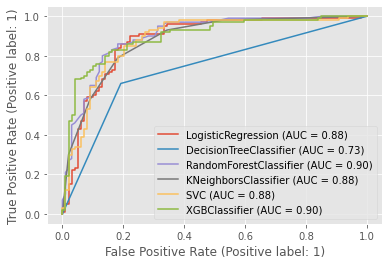

In [60]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

RandomForestClassifier and XGBClassifier are giving us best performance compared to other algorithms, we will select RandomForestClassifier as a best suitable model, as it is giving good performance as well as it has least difference in accuracy and cv score next to KNeighborsClassifier.

## Hyperparameter Tuning

In [56]:
#lets select different parameters
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [5,9,10,12,15],
                'n_estimators':[100,200,500,700],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2,3,4,6]
                }

In [57]:
#Use GridSearchCV and train with given parameters to select best parameters
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 9, 10, 12, 15],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 6],
                         'n_estimators': [100, 200, 500, 700]})

In [58]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

In [59]:
#Let's train and test our model using best parameters
model = RandomForestClassifier(criterion='gini', max_depth=15, max_features='log2', n_estimators=700, min_samples_split = 2)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

Accuracy Score: 83.91959798994975%
---------------------------------------------------
roc_auc_score: 82.9191919191919%
---------------------------------------------------
Confusion Matrix : 
 [[83 16]
 [16 84]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.84      0.84      0.84       100

    accuracy                           0.84       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.84      0.84      0.84       199

---------------------------------------------------


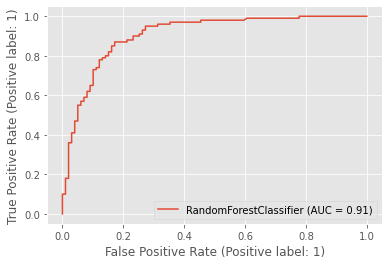

In [61]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(model, x_test, y_test)

* Great after Hyperparameter tuning we have improved our model accuracy from 82.91% to 83.91%
* And by observing above roc curve and AUC we can say model performance also improved

## Model Saving

In [62]:
import joblib
joblib.dump(model,"Loan_ststus_prediction.pkl")

['Loan_ststus_prediction.pkl']